In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import re
import pickle
from helpers import *
from gensim.utils import lemmatize
from nltk.stem import WordNetLemmatizer

In [2]:
df = pd.read_csv('Final_dataset.csv', index_col=0)
df.head(2)

,author,publish_date,following,followers,post_type,account_category,reply_count,like_count,retweet_count,hashtags,topic,topic_scores,tweet_text
1,1D_NICOLE_,2015-11-26 22:20:00,48,40,RETWEET,Fearmonger,0.0,0.0,15.0,"[FoodPoisoning, Walmart, KochFarms]",Trump,[-8.1184225 -4.818271 -2.6408563 -0.574982...,#FoodPoisoning is not a joke! #Walmart #KochFa...
2,1D_NICOLE_,2015-11-26 22:35:00,48,40,RETWEET,Fearmonger,1.0,0.0,20.0,"[turkey, KochFarms]",Patriot,[ -9.862805 -4.7526827 4.4411793 -10.09800...,Thanks God that #turkey i ate few days ago was...


In [3]:
topics = df.topic.value_counts().index

In [4]:
# Load stopwords
stopwords2 = open(access_folder() + 'morestopwords.txt', "r").read().split('\n')
stopwords2 = list(filter(None, stopwords2)) # fastest
stopwords2 = [word for word in stopwords2 if word[0]!='#' ]
stopwords3 = open(access_folder() + 'common-english-prep-conj.txt' , "r").read().split(',')
stopwords4 = open(access_folder() + 'common-english-words.txt' , "r").read().split(',')
stopwords = stopwords2 +  stopwords3 + stopwords4

## Tokenizing + Lemmatizing the tweets

In [7]:
from __future__ import unicode_literals
import pandas as pd
import re
import numpy as np
import pickle
from helpers import *
from gensim.utils import lemmatize
from nltk.stem import WordNetLemmatizer
import operator
import sys


def remove_nonword(df):
    """Given a dataset with column called tweet_text, clean the tweets in tweet_text such that
    the hashtags are removed, the @ handles are removed, the RT (retweet) symbols are removed
    and the websites and punctuation are removed"""

    clean = df.replace('#\w+', '', regex=True).replace('@\w+', '', regex=True).replace('RT ', '', regex=True)
    clean.tweet_text = clean.tweet_text.apply(lambda x: re.sub(r'http\S+', '', x)).apply(lambda x: re.sub(r"'|\"|’|`|-|:|\?|~|,|\.", '', x))
    return clean


def token_stop(tweet, stopwords, filter_size=2):
    """Using functions from python file, tokenize and remove stopwords"""
    tokens = tokenizeRawTweetText(tweet)
    tokens = [token.lower() for token in tokens if token.lower() not in stopwords]
    return tokens



def lemmatize_tweets(tweet, min_length=3):
    """Takes in series that contains list of tokenizes words and lemmatizes them (gets rid of plurals etc)"""
    lemmatizer = WordNetLemmatizer()
    sentence = []
    for word in tweet:
        x = lemmatizer.lemmatize(word)
        if len(x) >= 3:
            sentence.append(x)
    return sentence


def create_array(lemmatized_tweet, total_words, dictionary):
    """Takes the lemmatized tweets and converts them to input array using the dictionary"""
    input_layer = np.zeros(total_words, dtype=float)
    for word in lemmatized_tweet:
        if word in dictionary.keys():
            input_layer[dictionary[word.lower()]] += 1
    return input_layer







#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Twokenize -- a tokenizer designed for Twitter text in English and some other European languages.
This tokenizer code has gone through a long history:
(1) Brendan O'Connor wrote original version in Python, http://github.com/brendano/tweetmotif
       TweetMotif: Exploratory Search and Topic Summarization for Twitter.
       Brendan O'Connor, Michel Krieger, and David Ahn.
       ICWSM-2010 (demo track), http://brenocon.com/oconnor_krieger_ahn.icwsm2010.tweetmotif.pdf
(2a) Kevin Gimpel and Daniel Mills modified it for POS tagging for the CMU ARK Twitter POS Tagger
(2b) Jason Baldridge and David Snyder ported it to Scala
(3) Brendan bugfixed the Scala port and merged with POS-specific changes
    for the CMU ARK Twitter POS Tagger
(4) Tobi Owoputi ported it back to Java and added many improvements (2012-06)
Current home is http://github.com/brendano/ark-tweet-nlp and http://www.ark.cs.cmu.edu/TweetNLP
There have been at least 2 other Java ports, but they are not in the lineage for the code here.
Ported to Python by Myle Ott <myleott@gmail.com>.
"""



try:
    from html.parser import HTMLParser
except ImportError:
    from HTMLParser import HTMLParser

try:
    import html
except ImportError:
    pass

def regex_or(*items):
    return '(?:' + '|'.join(items) + ')'

Contractions = re.compile(u"(?i)(\w+)(n['’′]t|['’′]ve|['’′]ll|['’′]d|['’′]re|['’′]s|['’′]m)$", re.UNICODE)
Whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)

punctChars = r"['\"“”‘’.?!…,:;]"
#punctSeq   = punctChars+"+"	#'anthem'. => ' anthem '.
punctSeq   = r"['\"“”‘’]+|[.?!,…]+|[:;]+"	#'anthem'. => ' anthem ' .
entity     = r"&(?:amp|lt|gt|quot);"
#  URLs


# BTO 2012-06: everyone thinks the daringfireball regex should be better, but they're wrong.
# If you actually empirically test it the results are bad.
# Please see https://github.com/brendano/ark-tweet-nlp/pull/9

urlStart1  = r"(?:https?://|\bwww\.)"
commonTLDs = r"(?:com|org|edu|gov|net|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|pro|tel|travel|xxx)"
ccTLDs	 = r"(?:ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|" + \
r"bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|" + \
r"er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|" + \
r"hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|" + \
r"lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|" + \
r"nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|sk|" + \
r"sl|sm|sn|so|sr|ss|st|su|sv|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|" + \
r"va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|za|zm|zw)"	#TODO: remove obscure country domains?
urlStart2  = r"\b(?:[A-Za-z\d-])+(?:\.[A-Za-z0-9]+){0,3}\." + regex_or(commonTLDs, ccTLDs) + r"(?:\."+ccTLDs+r")?(?=\W|$)"
urlBody    = r"(?:[^\.\s<>][^\s<>]*?)?"
urlExtraCrapBeforeEnd = regex_or(punctChars, entity) + "+?"
urlEnd     = r"(?:\.\.+|[<>]|\s|$)"
url        = regex_or(urlStart1, urlStart2) + urlBody + "(?=(?:"+urlExtraCrapBeforeEnd+")?"+urlEnd+")"


# Numeric
timeLike   = r"\d+(?::\d+){1,2}"
#numNum     = r"\d+\.\d+"
numberWithCommas = r"(?:(?<!\d)\d{1,3},)+?\d{3}" + r"(?=(?:[^,\d]|$))"
numComb	 = u"[\u0024\u058f\u060b\u09f2\u09f3\u09fb\u0af1\u0bf9\u0e3f\u17db\ua838\ufdfc\ufe69\uff04\uffe0\uffe1\uffe5\uffe6\u00a2-\u00a5\u20a0-\u20b9]?\\d+(?:\\.\\d+)+%?"

# Abbreviations
boundaryNotDot = regex_or("$", r"\s", r"[“\"?!,:;]", entity)
aa1  = r"(?:[A-Za-z]\.){2,}(?=" + boundaryNotDot + ")"
aa2  = r"[^A-Za-z](?:[A-Za-z]\.){1,}[A-Za-z](?=" + boundaryNotDot + ")"
standardAbbreviations = r"\b(?:[Mm]r|[Mm]rs|[Mm]s|[Dd]r|[Ss]r|[Jj]r|[Rr]ep|[Ss]en|[Ss]t)\."
arbitraryAbbrev = regex_or(aa1, aa2, standardAbbreviations)
separators  = "(?:--+|―|—|~|–|=)"
decorations = u"(?:[♫♪]+|[★☆]+|[♥❤♡]+|[\u2639-\u263b]+|[\ue001-\uebbb]+)"
thingsThatSplitWords = r"[^\s\.,?\"]"
embeddedApostrophe = thingsThatSplitWords+r"+['’′]" + thingsThatSplitWords + "*"

#  Emoticons
# myleott: in Python the (?iu) flags affect the whole expression
#normalEyes = "(?iu)[:=]" # 8 and x are eyes but cause problems
normalEyes = "[:=]" # 8 and x are eyes but cause problems
wink = "[;]"
noseArea = "(?:|-|[^a-zA-Z0-9 ])" # doesn't get 😢
happyMouths = r"[D\)\]\}]+"
sadMouths = r"[\(\[\{]+"
tongue = "[pPd3]+"
otherMouths = r"(?:[oO]+|[/\\]+|[vV]+|[Ss]+|[|]+)" # remove forward slash if http://'s aren't cleaned

# mouth repetition examples:
# @aliciakeys Put it in a love song :-))
# @hellocalyclops =))=))=)) Oh well

# myleott: try to be as case insensitive as possible, but still not perfect, e.g., o.O fails
#bfLeft = u"(♥|0|o|°|v|\\$|t|x|;|\u0ca0|@|ʘ|•|・|◕|\\^|¬|\\*)".encode('utf-8')
bfLeft = u"(♥|0|[oO]|°|[vV]|\\$|[tT]|[xX]|;|\u0ca0|@|ʘ|•|・|◕|\\^|¬|\\*)"
bfCenter = r"(?:[\.]|[_-]+)"
bfRight = r"\2"
s3 = r"(?:--['\"])"
s4 = r"(?:<|&lt;|>|&gt;)[\._-]+(?:<|&lt;|>|&gt;)"
s5 = "(?:[.][_]+[.])"
# myleott: in Python the (?i) flag affects the whole expression
#basicface = "(?:(?i)" +bfLeft+bfCenter+bfRight+ ")|" +s3+ "|" +s4+ "|" + s5
basicface = "(?:" +bfLeft+bfCenter+bfRight+ ")|" +s3+ "|" +s4+ "|" + s5

eeLeft = r"[＼\\ƪԄ\(（<>;ヽ\-=~\*]+"
eeRight= u"[\\-=\\);'\u0022<>ʃ）/／ノﾉ丿╯σっµ~\\*]+"
eeSymbol = r"[^A-Za-z0-9\s\(\)\*:=-]"
eastEmote = eeLeft + "(?:"+basicface+"|" +eeSymbol+")+" + eeRight

oOEmote = r"(?:[oO]" + bfCenter + r"[oO])"


emoticon = regex_or(
        # Standard version  :) :( :] :D :P
        "(?:>|&gt;)?" + regex_or(normalEyes, wink) + regex_or(noseArea,"[Oo]") + regex_or(tongue+r"(?=\W|$|RT|rt|Rt)", otherMouths+r"(?=\W|$|RT|rt|Rt)", sadMouths, happyMouths),

        # reversed version (: D:  use positive lookbehind to remove "(word):"
        # because eyes on the right side is more ambiguous with the standard usage of : ;
        regex_or("(?<=(?: ))", "(?<=(?:^))") + regex_or(sadMouths,happyMouths,otherMouths) + noseArea + regex_or(normalEyes, wink) + "(?:<|&lt;)?",

        #inspired by http://en.wikipedia.org/wiki/User:Scapler/emoticons#East_Asian_style
        eastEmote.replace("2", "1", 1), basicface,
        # iOS 'emoji' characters (some smileys, some symbols) [\ue001-\uebbb]
        # TODO should try a big precompiled lexicon from Wikipedia, Dan Ramage told me (BTO) he does this

        # myleott: o.O and O.o are two of the biggest sources of differences
        #          between this and the Java version. One little hack won't hurt...
        oOEmote
)

Hearts = "(?:<+/?3+)+" #the other hearts are in decorations

Arrows = regex_or(r"(?:<*[-―—=]*>+|<+[-―—=]*>*)", u"[\u2190-\u21ff]+")

# BTO 2011-06: restored Hashtag, AtMention protection (dropped in original scala port) because it fixes
# "hello (#hashtag)" ==> "hello (#hashtag )"  WRONG
# "hello (#hashtag)" ==> "hello ( #hashtag )"  RIGHT
# "hello (@person)" ==> "hello (@person )"  WRONG
# "hello (@person)" ==> "hello ( @person )"  RIGHT
# ... Some sort of weird interaction with edgepunct I guess, because edgepunct
# has poor content-symbol detection.

# This also gets #1 #40 which probably aren't hashtags .. but good as tokens.
# If you want good hashtag identification, use a different regex.
Hashtag = "#[a-zA-Z0-9_]+"  #optional: lookbehind for \b
#optional: lookbehind for \b, max length 15
AtMention = "[@＠][a-zA-Z0-9_]+"

# I was worried this would conflict with at-mentions
# but seems ok in sample of 5800: 7 changes all email fixes
# http://www.regular-expressions.info/email.html
Bound = r"(?:\W|^|$)"
Email = regex_or("(?<=(?:\W))", "(?<=(?:^))") + r"[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,4}(?=" +Bound+")"

# We will be tokenizing using these regexps as delimiters
# Additionally, these things are "protected", meaning they shouldn't be further split themselves.
Protected  = re.compile(
    regex_or(
        Hearts,
        url,
        Email,
        timeLike,
        #numNum,
        numberWithCommas,
        numComb,
        emoticon,
        Arrows,
        entity,
        punctSeq,
        arbitraryAbbrev,
        separators,
        decorations,
        embeddedApostrophe,
        Hashtag,
        AtMention), re.UNICODE)

# Edge punctuation
# Want: 'foo' => ' foo '
# While also:   don't => don't
# the first is considered "edge punctuation".
# the second is word-internal punctuation -- don't want to mess with it.
# BTO (2011-06): the edgepunct system seems to be the #1 source of problems these days.
# I remember it causing lots of trouble in the past as well.  Would be good to revisit or eliminate.

# Note the 'smart quotes' (http://en.wikipedia.org/wiki/Smart_quotes)
#edgePunctChars    = r"'\"“”‘’«»{}\(\)\[\]\*&" #add \\p{So}? (symbols)
edgePunctChars    = u"'\"“”‘’«»{}\\(\\)\\[\\]\\*&" #add \\p{So}? (symbols)
edgePunct    = "[" + edgePunctChars + "]"
notEdgePunct = "[a-zA-Z0-9]" # content characters
offEdge = r"(^|$|:|;|\s|\.|,)"  # colon here gets "(hello):" ==> "( hello ):"
EdgePunctLeft  = re.compile(offEdge + "("+edgePunct+"+)("+notEdgePunct+")", re.UNICODE)
EdgePunctRight = re.compile("("+notEdgePunct+")("+edgePunct+"+)" + offEdge, re.UNICODE)

def splitEdgePunct(input):
    input = EdgePunctLeft.sub(r"\1\2 \3", input)
    input = EdgePunctRight.sub(r"\1 \2\3", input)
    return input

# The main work of tokenizing a tweet.
def simpleTokenize(text):

    # Do the no-brainers first
    splitPunctText = splitEdgePunct(text)

    textLength = len(splitPunctText)

    # BTO: the logic here got quite convoluted via the Scala porting detour
    # It would be good to switch back to a nice simple procedural style like in the Python version
    # ... Scala is such a pain.  Never again.

    # Find the matches for subsequences that should be protected,
    # e.g. URLs, 1.0, U.N.K.L.E., 12:53
    bads = []
    badSpans = []
    for match in Protected.finditer(splitPunctText):
        # The spans of the "bads" should not be split.
        if (match.start() != match.end()): #unnecessary?
            bads.append( [splitPunctText[match.start():match.end()]] )
            badSpans.append( (match.start(), match.end()) )

    # Create a list of indices to create the "goods", which can be
    # split. We are taking "bad" spans like
    #     List((2,5), (8,10))
    # to create
    #     List(0, 2, 5, 8, 10, 12)
    # where, e.g., "12" here would be the textLength
    # has an even length and no indices are the same
    indices = [0]
    for (first, second) in badSpans:
        indices.append(first)
        indices.append(second)
    indices.append(textLength)

    # Group the indices and map them to their respective portion of the string
    splitGoods = []
    for i in range(0, len(indices), 2):
        goodstr = splitPunctText[indices[i]:indices[i+1]]
        splitstr = goodstr.strip().split(" ")
        splitGoods.append(splitstr)

    #  Reinterpolate the 'good' and 'bad' Lists, ensuring that
    #  additonal tokens from last good item get included
    zippedStr = []
    for i in range(len(bads)):
        zippedStr = addAllnonempty(zippedStr, splitGoods[i])
        zippedStr = addAllnonempty(zippedStr, bads[i])
    zippedStr = addAllnonempty(zippedStr, splitGoods[len(bads)])

    # BTO: our POS tagger wants "ur" and "you're" to both be one token.
    # Uncomment to get "you 're"
    #splitStr = []
    #for tok in zippedStr:
    #    splitStr.extend(splitToken(tok))
    #zippedStr = splitStr

    return zippedStr

def addAllnonempty(master, smaller):
    for s in smaller:
        strim = s.strip()
        if (len(strim) > 0):
            master.append(strim)
    return master

# "foo   bar " => "foo bar"
def squeezeWhitespace(input):
    return Whitespace.sub(" ", input).strip()

# Final pass tokenization based on special patterns
def splitToken(token):
    m = Contractions.search(token)
    if m:
        return [m.group(1), m.group(2)]
    return [token]

# Assume 'text' has no HTML escaping.
def tokenize(text):
    return simpleTokenize(squeezeWhitespace(text))


# Twitter text comes HTML-escaped, so unescape it.
# We also first unescape &amp;'s, in case the text has been buggily double-escaped.
def normalizeTextForTagger(text):
    assert sys.version_info[0] >= 3 and sys.version_info[1] > 3, 'Python version >3.3 required'
    text = text.replace("&amp;", "&")
    text = html.unescape(text)
    return text

# This is intended for raw tweet text -- we do some HTML entity unescaping before running the tagger.
#
# This function normalizes the input text BEFORE calling the tokenizer.
# So the tokens you get back may not exactly correspond to
# substrings of the original text.
def tokenizeRawTweetText(text):
    tokens = tokenize(normalizeTextForTagger(text))
    return tokens


# Wordcloud generation

In [37]:
df.topic.value_counts()

Trump                93910
Sports               84079
Black                68307
Entertainment        52155
Health               37749
Crime                21316
Islam                17781
Foreign Countries    13848
Trump Adversaries    13405
Patriot               8825
Fukushima              478
Name: topic, dtype: int64

In [70]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Crime'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtext =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

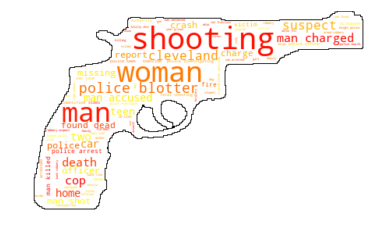

In [76]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'gun.png'))

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=50, random_state=1, contour_width=1, colormap='autumn')
# generate word cloud
wc.generate(bigtext)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("crimecloud.png")

In [72]:
?WordCloud

In [77]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Sports'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextsport =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

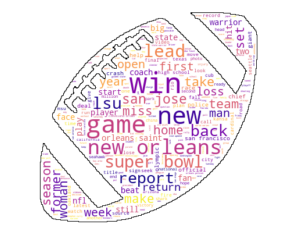

In [94]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'sports.jpg'))
trumpo[trumpo > 120] = 255
trumpo[trumpo < 120] = 0

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=50, random_state=1, contour_width=1, colormap='plasma')
# generate word cloud
wc.generate(bigtextsport)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("sportscloud.png")

In [78]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Black'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextblack =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

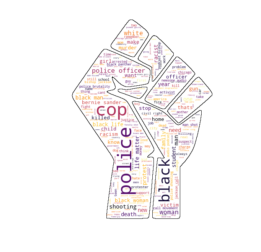

In [93]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'black.jpg'))
trumpo[trumpo > 120] = 255
trumpo[trumpo < 120] = 0

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=50, random_state=1, contour_width=1, colormap='inferno')
# generate word cloud
wc.generate(bigtextblack)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("blackcloud.png")

In [79]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Entertainment'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextent =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

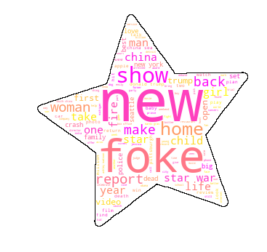

In [122]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'ent.jpg'))
trumpo[trumpo >0.5] = 255
trumpo[trumpo < 0.5] = 0

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=80, random_state=1, contour_width=1, colormap='spring')
# generate word cloud
wc.generate(bigtextent)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("entcloud.png")

In [80]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Health'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtexthealth =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

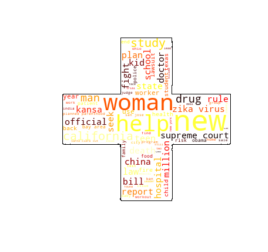

In [96]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'health.jpg'))
trumpo[trumpo > 120] = 255
trumpo[trumpo < 120] = 0

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=50, random_state=1, contour_width=1, colormap='hot')
# generate word cloud
wc.generate(bigtexthealth)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("healthcloud.png")

In [81]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Islam'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextislam =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

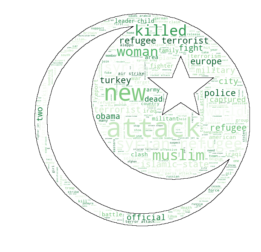

In [124]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'islam.jpg'))
trumpo[trumpo > 120] = 255
trumpo[trumpo < 120] = 0

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=70, random_state=1, contour_width=1, colormap='Greens')
# generate word cloud
wc.generate(bigtextislam)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("islamcloud.png")

In [82]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Trump Adversaries'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextadv =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

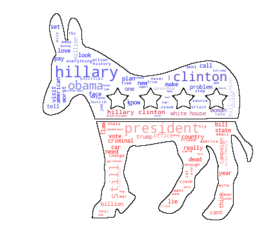

In [112]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'demo.jpg'))
trumpo[trumpo > 120] = 255
trumpo[trumpo < 120] = 0


wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=70, random_state=1, contour_width=1,  mode="RGB")
# generate word cloud
wc.generate(bigtextadv)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("democloud.png")

In [83]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Patriot'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextpat =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

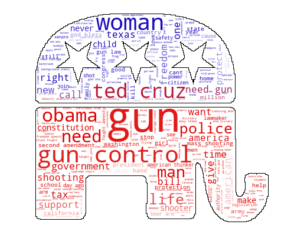

In [123]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'patriot.png'))

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=70, random_state=1, contour_width=1,  mode="RGB")
# generate word cloud
wc.generate(bigtextpat)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("patcloud.png")

In [84]:
import itertools

# load dictionary for model
dict_model = pickle.load(open(access_folder('generated') + 'dictionary_nonews.pkl','rb'))  
total_words = len(dict_model)


# First Clean
clean = remove_nonword(df[df.topic == 'Foreign Countries'])

# Tokenize and create input arrays
clean.tweet_text = clean.tweet_text.apply(lambda x: token_stop(x, stopwords))\
                                   .apply(lambda x: lemmatize_tweets(x, min_length=3))

bigtextfor =' '.join(list(itertools.chain.from_iterable(clean.tweet_text.values)))

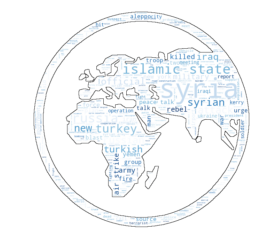

In [115]:
from PIL import Image

trumpo = np.array(Image.open(access_folder('generated') + 'foreign.jpg'))
trumpo[trumpo > 120] = 255
trumpo[trumpo < 120] = 0

wc = WordCloud(background_color="white", max_words=3000, mask=trumpo, max_font_size=100, random_state=1, contour_width=1, colormap='Blues')
# generate word cloud
wc.generate(bigtextfor)

# create coloring from image
image_colors = ImageColorGenerator(trumpo)

plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

wc.to_file("foreigncloud.png")